In [14]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

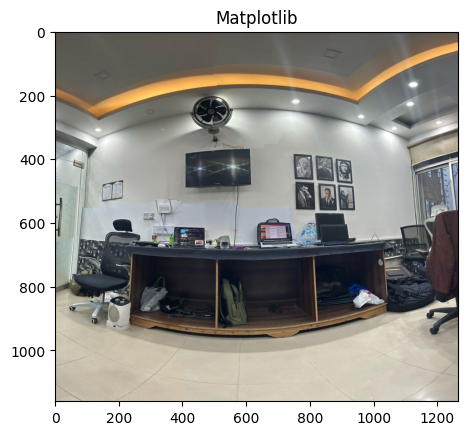

In [23]:
#Laod a YOLO v3 - Pretrained Model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

#load names of the classes from Microsoft COCO Dataset
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f]

#Take the input image
image = cv2.imread("pano4.jpg")

#Visualize it 
b,g,r = cv2.split(image)
frame_rgb = cv2.merge((r,g,b))
plt.imshow(frame_rgb)
plt.title('Matplotlib') 
plt.show()

#Extract Image Height & Width
height, width, _ = image.shape
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

#Extract the bounding boxes 
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        #Saving all images with atleast a 35% confidence
        if confidence > 0.35:
            
            #Detected Object
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            #Coordinates of the detected object
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            #Saving the detected object (sub-image)
            detected_object = image[y:y+h, x:x+w]
            cv2.imwrite(os.path.join("all_detected/", f"{classes[class_id]}_{confidence:.2f}.jpg"), detected_object)

cv2.destroyAllWindows()